## Importing libraries


In [145]:
import nltk
nltk.download(['stopwords', 'punkt', 'wordnet', 'averaged_perceptron_tagger'])

[nltk_data] Downloading package stopwords to C:\Users\LENOVO
[nltk_data]     LEGION\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\LENOVO
[nltk_data]     LEGION\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\LENOVO
[nltk_data]     LEGION\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\LENOVO LEGION\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [146]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
from tqdm import tqdm
import re
import nltk
from bs4 import BeautifulSoup as bs
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

eng_stopwords = stopwords.words('english')


## Reading the data

In [147]:
train = pd.read_csv("C:\\Users\\LENOVO LEGION\\Desktop\\Alex\\Final Flask\\labeledTrainData.tsv", header=0, \
                    delimiter="\t", quoting=3)

In [148]:
train.drop('id',inplace=True,axis=1)
train_copy=train.copy(deep=True)
train.head()

,sentiment,review
0,1,"""With all this stuff going down at the moment ..."
1,1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,0,"""The film starts with a manager (Nicholas Bell..."
3,0,"""It must be assumed that those who praised thi..."
4,1,"""Superbly trashy and wondrously unpretentious ..."


<AxesSubplot:>

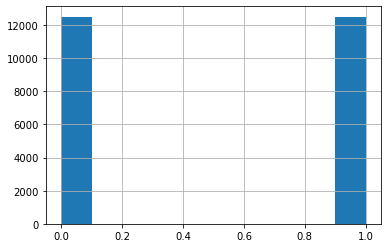

In [149]:
train.sentiment.hist()

In [150]:
train.shape

(25000, 2)

In [151]:
train['sentiment'].value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

In [152]:
lengths = train['review'].apply(len)

print('Average character length of the reviews are:')
print (np.mean(lengths))

Average character length of the reviews are:
1329.71056


In [153]:
review3 = train['review'][2] # the review used for initial analysis
print(review3)

"The film starts with a manager (Nicholas Bell) giving welcome investors (Robert Carradine) to Primal Park . A secret project mutating a primal animal using fossilized DNA, like ¨Jurassik Park¨, and some scientists resurrect one of nature's most fearsome predators, the Sabretooth tiger or Smilodon . Scientific ambition turns deadly, however, and when the high voltage fence is opened the creature escape and begins savagely stalking its prey - the human visitors , tourists and scientific.Meanwhile some youngsters enter in the restricted area of the security center and are attacked by a pack of large pre-historical animals which are deadlier and bigger . In addition , a security agent (Stacy Haiduk) and her mate (Brian Wimmer) fight hardly against the carnivorous Smilodons. The Sabretooths, themselves , of course, are the real star stars and they are astounding terrifyingly though not convincing. The giant animals savagely are stalking its prey and the group run afoul and fight against on

### Nan/Null Value and Duplicate Checks

In [154]:
print("We have {} NaN/Null values in dataset ".format(train.isnull().values.sum()))
print("Number of duplicate in  dataset : {} ".format(sum(data['review'].duplicated())))

We have 0 NaN/Null values in dataset 


NameError: name 'data' is not defined

In [ ]:
#removing duplicate rows
print('REMOVING DUPLICATE ROWS....')
train=train.drop_duplicates(subset={'review'}, keep='first', inplace=False)
train.shape

In [ ]:
# printing some random reviews
print('------PRINTING SOME RANDOM REVIEWS-----')
print('\n')
sent_0 = train['review'].values[0]
print(sent_0)

print("="*200)

sent_1000 = train['review'].values[1000]
print(sent_1000)
print("="*200)

sent_1500 = train['review'].values[1500]
print(sent_1500)
print("="*200)

sent_4900 = train['review'].values[4900]
print(sent_4900)
print("="*200)

## Data Preprocessing

### Removing all urls from data

In [ ]:
# remove urls from text python: https://stackoverflow.com/a/40823105/4084039
sent_0 = re.sub(r"http\S+", "", sent_0)
sent_1000 = re.sub(r"http\S+", "", sent_1000)
sent_150 = re.sub(r"http\S+", "", sent_1500)
sent_4900 = re.sub(r"http\S+", "", sent_4900)

print(sent_0)

### Removing all tags from data

In [ ]:
# https://stackoverflow.com/questions/16206380/python-beautifulsoup-how-to-remove-all-tags-from-an-element

soup = bs(sent_0, 'lxml')
text = soup.get_text()
print(text)
print("="*200)

soup = bs(sent_1000, 'lxml')
text = soup.get_text()
print(text)
print("="*200)

soup = bs(sent_1500, 'lxml')
text = soup.get_text()
print(text)
print("="*200)

soup = bs(sent_4900, 'lxml')
text = soup.get_text()
print(text)

### Decontracting the words

In [155]:
def decontracted(phrase):
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

### Removing words with numbers from data

In [156]:
sent_0 = re.sub("\S*\d\S*", "", sent_0).strip()
print(sent_0)

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

### Removing special character from data

In [157]:
sent_1500 = re.sub('[^A-Za-z0-9]+', ' ', sent_1500)
print(sent_1500)

 Deathtrap runs like a play within a movie about who did what to whom as it primarily takes place on one set The premise is that an accomplished playwright whose star is falling receives a magnificent manuscript from a former student and so he plans to off his protege and appropriate his play to the loud protests of his wife Or so you think for the first half of the movie Past the halfway mark Deathtrap begins to throw in twists and surprises that turn its premise on its head then right around and then in a mad spin all the time keeping its title appropriate It s an excellent mystery movie soaked in wit br br Michael Caine as the senior playwright plays himself in this movie a slightly loony and very dramatic Brit No surprises here he does his usual good work He gets the best line of Deathtrap which he executes perfectly What is your definition of success being gang banged in a state penitentiary br br Christopher Reeve on the other hand juggles comedy and drama in a surprisingly stron

In [158]:
def cleaning(data):
  preprocessed_reviews = []
  for sentence in tqdm(train['review'].values):
    sentence = re.sub(r"http\S+", "", sentence)
    sentence = bs(sentence, 'lxml').get_text()
    sentence = decontracted(sentence)
    sentence = re.sub("\S*\d\S*", "", sentence).strip()
    sentence = re.sub('[^A-Za-z]+', ' ', sentence)
    sentence = ' '.join(e.lower() for e in sentence.split() if e.lower() not in eng_stopwords)
    
    preprocessed_reviews.append(sentence.strip())
  data['review']=preprocessed_reviews
  return data


In [159]:
data_after_cleaning=cleaning(train) #dataframe after cleaning
data_after_cleaning.to_csv('after_cleaning.csv')# saving csv file after cleaning

100%|██████████████████████████████████████████████████████████████████████████| 25000/25000 [00:18<00:00, 1374.77it/s]


In [160]:
print('-----DATA BEFORE CLEANING-----')
print('\n')
print(data_model['review'][9])
print('\n')
print(data_model['review'][100])
print('\n')
print('-----DATA AFTER CLEANING-----')
print('\n')
print(data_after_cleaning['review'][9])
print('\n')
print(data_after_cleaning['review'][100])

-----DATA BEFORE CLEANING-----


movie full references like mad max ii wild one many others ladybug face clear reference tribute peter lorre movie masterpiece talk much future


uk edition show rather less extravagant us version person concerned get new kitchen perhaps bedroom bathroom wonderfully grateful got us version show everything reality tv instead making improvements house occupants could afford entire house gets rebuilt know show trying show lousy welfare system exists us beg hard enough receive rather vulgar product placement takes place particularly sears also uncalled rsther turning one family deprived area potential millionaires would far better help community whole instead spending hundreds thousands dollars one home build something whole community perhaps place diy power tools borrowed returned along building materials everyone benefit want giving one person cause enormous resentment among rest local community still live run houses


-----DATA AFTER CLEANING-----


movie

## Featurization of data

In [161]:
data_model=pd.read_csv("C:\\Users\\LENOVO LEGION\\Desktop\\Alex\\Final Flask\\after_cleaning.csv")

In [162]:
data_model.drop('Unnamed: 0',inplace=True,axis=1)
data_model=data_model.copy(deep=True)
data_model.head()

,sentiment,review
0,1,stuff going moment mj started listening music ...
1,1,classic war worlds timothy hines entertaining ...
2,0,film starts manager nicholas bell giving welco...
3,0,must assumed praised film greatest filmed oper...
4,1,superbly trashy wondrously unpretentious explo...


In [163]:
X=data_model['review']
Y=train['sentiment']
print(X.shape)
print(Y.shape)

(25000,)
(25000,)


In [164]:
# splitting into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42)
print('TRAIN DATA - ',X_train.shape)
print('\n')
print('TEST DATA - ',X_test.shape)

TRAIN DATA -  (20000,)


TEST DATA -  (5000,)


### Bag of words

In [165]:
#bag of words
vectorizer_bow = CountVectorizer(min_df=1,ngram_range=(1,4), max_features=5000)
vectorizer_bow.fit(X_train.values)  #fitting
x_train_bow= vectorizer_bow.transform(X_train.values) 
x_test_bow= vectorizer_bow.transform(X_test.values)

print("After vectorizations")
print(x_train_bow.shape, y_train.shape)
print(x_test_bow.shape, y_test.shape)
print("="*40)

After vectorizations
(20000, 5000) (20000,)
(5000, 5000) (5000,)


### Tf-Idf

In [166]:
#tfidf
tfidfvectorizer = TfidfVectorizer(min_df=1,max_features=2)
text_tfidf = tfidfvectorizer.fit(X_train.values) #fitting

X_train =tfidfvectorizer.transform(X_train.values) 
X_test =tfidfvectorizer.transform(X_test.values)

print("After vectorizations")
print(X_train_tfidf.shape, y_train.shape)
print(X_test_tfidf.shape, y_test.shape)
print("="*40)

After vectorizations
(19923, 5000) (20000,)
(4981, 5000) (5000,)


## Modeling

* For modelling we use only tf-idf vectorized data only.

Random Forest

In [167]:
forest = RandomForestClassifier(n_estimators = 50) 

param_grid = {'n_estimators': [50,55]}

forest_cv = GridSearchCV(forest, param_grid, cv = 2)

forest = forest.fit(X_train, y_train)

cv = forest_cv.fit(X_train,  y_train)

print("Tuned Random Forest Parameters: {}".format(forest_cv.best_params_)) 
print("Best score is {}".format(forest_cv.best_score_))

Tuned Random Forest Parameters: {'n_estimators': 55}
Best score is 0.55125


In [168]:
#forest = forest.fit(X_train_tfidf, y_train) # can take 20 seconds to run
forest.predict(X_test)

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [169]:
d = tfidfvectorizer.fit_transform(['good movie'])

In [170]:
forest.predict(d)

array([1], dtype=int64)

In [171]:
cv.predict(X_test_tfidf)

ValueError: X has 5000 features, but RandomForestClassifier is expecting 2 features as input.

In [ ]:
print("Forest Accuracy: ",(accuracy_score(y_test,forest.predict(X_test))))
print("CV Accuracy: ",(accuracy_score(y_test,cv.predict(X_test))))

Model Ready

In [ ]:
pickle.dump(tfidfvectorizer,open('model2.pickle','wb'))

In [ ]:
pickle.dump(forest,open('model.pickle','wb'))

In [ ]:
with open("model2.pickle","rb") as f:
    sentiment = pickle.load(f)

In [ ]:
with open("model.pickle","rb") as f:
    result = pickle.load(f)

In [ ]:
print(sentiment)

In [ ]:
print(result)